In [1]:
import tensorflow as tf

In [2]:
from tensorflow import keras

In [3]:
import matplotlib.pyplot as plt

In [4]:
import random

In [5]:
mnist=tf.keras.datasets.mnist

In [6]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [7]:
x_train=x_train/255
x_test=x_test/255

In [8]:
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128,activation="relu"),
    keras.layers.Dense(10,activation="softmax")
])

C:\Users\Suraj\anaconda3\suru\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [9]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
model.compile(optimizer="sgd",
             loss="sparse_categorical_crossentropy",
             metrics=['accuracy'])
history=model.fit(x_train,
                 y_train,validation_data=(x_test,y_test),epochs=3)

Epoch 1/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.7283 - loss: 1.0305 - val_accuracy: 0.9026 - val_loss: 0.3564
Epoch 2/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8996 - loss: 0.3589 - val_accuracy: 0.9172 - val_loss: 0.2928
Epoch 3/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9177 - loss: 0.2931 - val_accuracy: 0.9264 - val_loss: 0.2606


In [11]:
test_loss,test_acc=model.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9151 - loss: 0.3015


In [12]:
print("Loss=%.3f" %test_loss)
print("Accuracy=%.3f" %test_acc)

Loss=0.261
Accuracy=0.926


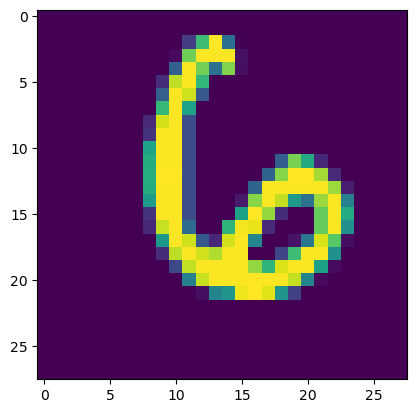

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


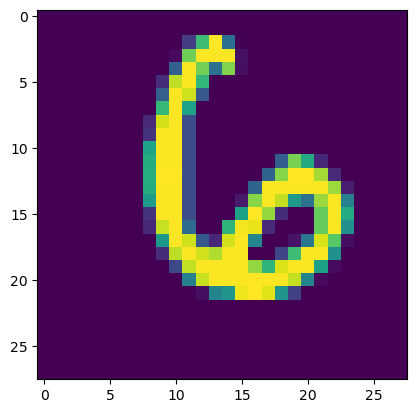

Predicted value: [2.9415671e-05 1.1227515e-06 1.4634823e-03 4.4818071e-06 4.0957485e-03
 5.4210970e-05 9.9402583e-01 7.9268561e-05 6.5227170e-05 1.8116985e-04]


In [13]:
n=random.randint(0,9999)
plt.imshow(x_test[n])
plt.show()
predicted_value=model.predict(x_test)
plt.imshow(x_test[n])
plt.show()
print('Predicted value:',predicted_value[n])


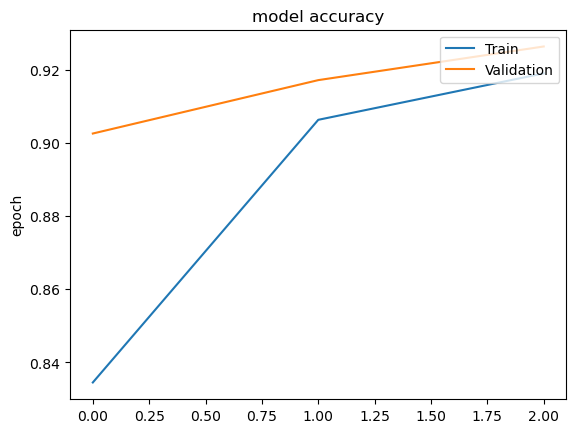

In [14]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.ylabel('epoch')

plt.legend(['Train','Validation'],loc='upper right')
plt.show()

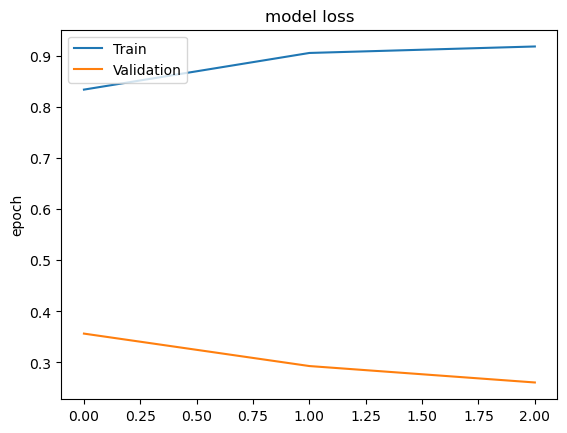

In [15]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('accuracy')
plt.ylabel('epoch')

plt.legend(['Train','Validation'],loc='upper left')
plt.show()